# HW 1 
Problem Weather Data

In [1]:
import pandas as pd
print(pd.__version__)
import csv
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None 

string_path_weather = "/Users/rahulsharma/Desktop/BIg data/HOME WORK1/US_WeatherEvents_2016-2019.csv"

string_path_trump_tweet = "/Users/rahulsharma/Desktop/BIg data/HOME WORK1/trumptweets.csv"

weather_input = pd.read_csv(string_path_weather) 

tweet_input = pd.read_csv(string_path_trump_tweet) 


1.0.1


1. How many snow events were recorded?

In [2]:
total_snow = weather_input.loc[weather_input['Type']=="Snow"]
total_snow['total_snow'] = 1
total_snow = total_snow.groupby(['Type']).count()['total_snow']
total_snow = total_snow[0]
print("total_snow = ",total_snow)


total_snow =  679472


2. How many moderate snow events were recorded each year? Produce a table and line plot

Moderate snow in 2016: 16900
Moderate snow in 2017: 15779
Moderate snow in 2018: 18684
Moderate snow in 2019: 22278


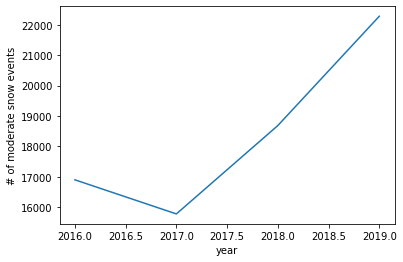

In [3]:
moderate_snow_2016  = weather_input.loc[(weather_input['Severity']=="Moderate") & (weather_input['Type']=="Snow") 
 & (weather_input['StartTime(UTC)'].str.contains('2016') ) ]                                                          
moderate_snow_2016['moderate_snow_2016'] = 1
test = moderate_snow_2016.groupby(['Type','Severity' ]).count()['moderate_snow_2016']
moderate_snow_2016 = test[0]
print("Moderate snow in 2016:",moderate_snow_2016)


moderate_snow_2017  = weather_input.loc[(weather_input['Severity']=="Moderate") & (weather_input['Type']=="Snow") 
 & (weather_input['StartTime(UTC)'].str.contains('2017') ) ]                                                          
moderate_snow_2017['moderate_snow_2017'] = 1
moderate_snow_2017 = moderate_snow_2017.groupby(['Type','Severity' ]).count()['moderate_snow_2017']
moderate_snow_2017 = moderate_snow_2017[0]
print("Moderate snow in 2017:",moderate_snow_2017) 

moderate_snow_2018  = weather_input.loc[(weather_input['Severity']=="Moderate") & (weather_input['Type']=="Snow") 
 & (weather_input['StartTime(UTC)'].str.contains('2018') ) ]                                                          
moderate_snow_2018['moderate_snow_2018'] = 1
moderate_snow_2018 = moderate_snow_2018.groupby(['Type','Severity' ]).count()['moderate_snow_2018']
moderate_snow_2018 = moderate_snow_2018[0]
print("Moderate snow in 2018:",moderate_snow_2018) 

moderate_snow_2019  = weather_input.loc[(weather_input['Severity']=="Moderate") & (weather_input['Type']=="Snow") 
 & (weather_input['StartTime(UTC)'].str.contains('2019') ) ]                                                          
moderate_snow_2019['moderate_snow_2019'] = 1
moderate_snow_2019 = moderate_snow_2019.groupby(['Type','Severity' ]).count()['moderate_snow_2019']
moderate_snow_2019 = moderate_snow_2019[0]
print("Moderate snow in 2019:",moderate_snow_2019) 

x = [2016, 2017,2018,2019]
y = [moderate_snow_2016,moderate_snow_2017,moderate_snow_2018,moderate_snow_2019]
plt.plot(x,y)
plt.ylabel('# of moderate snow events')
plt.xlabel('year')
plt.show()


3. How many snow events were recorded in each state?

In [4]:
snow_states= weather_input.loc[(weather_input['Type']=="Snow")]
snow_states['count'] = 1
states = snow_states.groupby(['State']).count()['count']
# states = states[0]
print("Snow events for each state")
print(states)


Snow events for each state
State
AL      701
AR     1461
AZ     4973
CA     8727
CO    38218
CT     3200
DE      663
FL       69
GA     1021
IA    26408
ID    19491
IL    17429
IN    12838
KS     5758
KY     5449
LA      401
MA     9595
MD     2842
ME    13821
MI    76455
MN    74201
MO     5662
MS      535
MT    23906
NC     4820
ND    33522
NE    16751
NH     9856
NJ     3695
NM     7561
NV     5852
NY    28592
OH    20848
OK     3078
OR     8988
PA    19555
RI     1530
SC      837
SD    16491
TN     1302
TX     3351
UT     8386
VA     9012
VT    10124
WA    12737
WI    46691
WV     8423
WY    43646
Name: count, dtype: int64


4. How many snow events were recorded each hour?


Snow events recorded each hour
0     26442
1     26284
2     26450
3     26421
4     27113
5     27210
6     27913
7     27693
8     28397
9     28839
10    29525
11    30026
12    30313
13    31593
14    32087
15    31020
16    29623
17    28661
18    27772
19    27686
20    27618
21    27130
22    27018
23    26638
Name: StartTime(UTC), dtype: int64


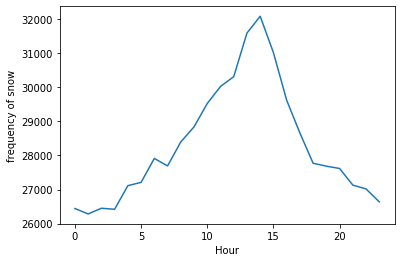

In [5]:
just_snow= weather_input.loc[(weather_input['Type']=="Snow") ]

snow_hourly = pd.DatetimeIndex(just_snow['StartTime(UTC)']).hour
snow_hourly = snow_hourly.value_counts().sort_index()

print("Snow events recorded each hour")
print(snow_hourly)

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [snow_hourly[0],snow_hourly[1],snow_hourly[2],snow_hourly[3],snow_hourly[4],snow_hourly[5],
     snow_hourly[6],snow_hourly[7],snow_hourly[8],snow_hourly[9],snow_hourly[10],snow_hourly[11],
     snow_hourly[12],snow_hourly[13],snow_hourly[14],snow_hourly[15],snow_hourly[16],snow_hourly[17],
     snow_hourly[18],snow_hourly[19],snow_hourly[20],snow_hourly[21],snow_hourly[22],snow_hourly[23]]
plt.plot(x,y)
plt.ylabel('frequency of snow')
plt.xlabel('Hour')
plt.show()

5. How many events of each severity did San Diego have? Produce a table and bar plot.

Events of each severity in SD
Severity
Heavy         62
Light       2870
Moderate    1992
Other          3
Severe      1365
UNK           15
Name: count, dtype: int64


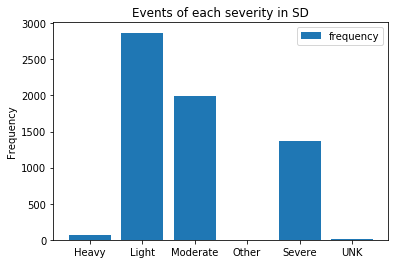

In [6]:
snow_occurance_00= weather_input.loc[(weather_input['City'] == 'San Diego') ]
snow_occurance_00['count'] = 1
snow_occurance_00 = snow_occurance_00.groupby(['Severity']).count()['count']
# snow_occurance_00 = snow_occurance_00[0]
print("Events of each severity in SD")
print( snow_occurance_00)

Severity=['Heavy','Light','Moderate','Other','Severe','UNK']
frequency = [62,2870,1992,3,1365,15]

xpos = np.arange(len(Severity))

plt.bar(xpos,frequency, label="frequency")

plt.xticks(xpos,Severity)
plt.ylabel("Frequency")
plt.title('Events of each severity in SD')
plt.legend()

# Trump Tweets
1. How many tweets did the President make each year? Produce a table of results and plot
the values.

Yearly tweets
2009      56
2010     143
2011     870
2012    4190
2013    8207
2014    5987
2015    7719
2016    3951
2017    2232
2018    2998
2019    4588
2020     181
Name: date, dtype: int64
56


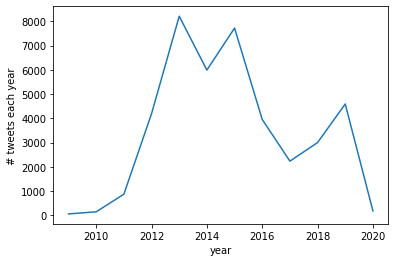

In [7]:
tweets_yearly= pd.DatetimeIndex(tweet_input['date']).year
tweets_yearly = tweets_yearly.value_counts().sort_index()
print("Yearly tweets")

print(tweets_yearly)

print(tweets_yearly[2009])


x = [2009,2010,2011,2012,2013,2014,2015,2016, 2017,2018,2019, 2020]
y = [tweets_yearly[2009], tweets_yearly[2010], tweets_yearly[2011], tweets_yearly[2012], 
     tweets_yearly[2013], tweets_yearly[2014], tweets_yearly[2015], tweets_yearly[2016], tweets_yearly[2017], 
     tweets_yearly[2018], tweets_yearly[2019], tweets_yearly[2020]]
plt.plot(x,y)
plt.ylabel('# tweets each year')
plt.xlabel('year')
plt.show()

2. How many tweets contain "Fake News"?

In [8]:
tweet_2016= tweet_input.loc[(tweet_input['content'].str.contains('Fake News', case=False))|
                            (tweet_input['content'].str.contains('FakeNews', case=False))|
                           (tweet_input['content'].str.contains('FakeNews', case=False))]
tweet_2016['count'] = 1
tweet_2016 = tweet_2016.groupby(['id']).count()['count']

print("Fake news Tweets: ", tweet_2016.shape[0])

Fake news Tweets:  579


3. A tweet with the location could be considered a security issue as it would give the current
location of the President. How many tweets contain a location?

In [9]:
geo_tweets= tweet_input.loc[(tweet_input['geo'].notnull() ) ]
geo_tweets['count'] = 1
geo_tweets = geo_tweets.groupby(['date']).count()['count']

print("Tweets with geo location:",geo_tweets.shape[0])

Tweets with geo location: 0


4. How many tweets were done each hour? Produce a table and a plot.

Hourly tweets
0     1620
1     1522
2     1795
3     1974
4     2076
5     1258
6      831
7      400
8      347
9      321
10     458
11     706
12    1377
13    2226
14    2448
15    2544
16    2319
17    2146
18    2025
19    2095
20    2696
21    3184
22    3050
23    1704
Name: date, dtype: int64


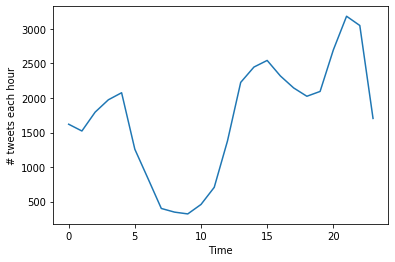

In [10]:
tweets_hourly = pd.DatetimeIndex(tweet_input['date']).hour
tweets_hourly = tweets_hourly.value_counts().sort_index()

print("Hourly tweets")
print(tweets_hourly)


x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [tweets_hourly[0],tweets_hourly[1],tweets_hourly[2],tweets_hourly[3],tweets_hourly[4],tweets_hourly[5],
     tweets_hourly[6],tweets_hourly[7],tweets_hourly[8],tweets_hourly[9],tweets_hourly[10],tweets_hourly[11],
     tweets_hourly[12],tweets_hourly[13],tweets_hourly[14],tweets_hourly[15],tweets_hourly[16],tweets_hourly[17],
     tweets_hourly[18],tweets_hourly[19],tweets_hourly[20],tweets_hourly[21],tweets_hourly[22],tweets_hourly[23]]

plt.plot(x,y)
plt.ylabel('# tweets each hour')
plt.xlabel('Time')
plt.show()